In [11]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Results.xlsx' 
df = pd.read_excel(excel_file)
df

,Model,Parameters (B),Model Size (GB),Inference Time (s),Inference Memory (MiB),Winogrande,Arc_challenge
0,gemma-2b,2.51,4.98,7.809,1840.84,0.6440,0.4565
1,float16 Precision,2.51,4.98,7.919,1864.18,0.6433,0.4565
2,4bit Quantization,1.55,2.16,8.234,1901.34,0.6409,0.4019
3,8bit Quantization,2.51,3.03,26.023,2062.42,0.5059,0.2201
4,Qlora,1.57,3.20,12.007,5862.96,0.4949,0.2602
5,Flash Attention 2,1.57,2.07,10.975,5028.16,0.6369,0.4249


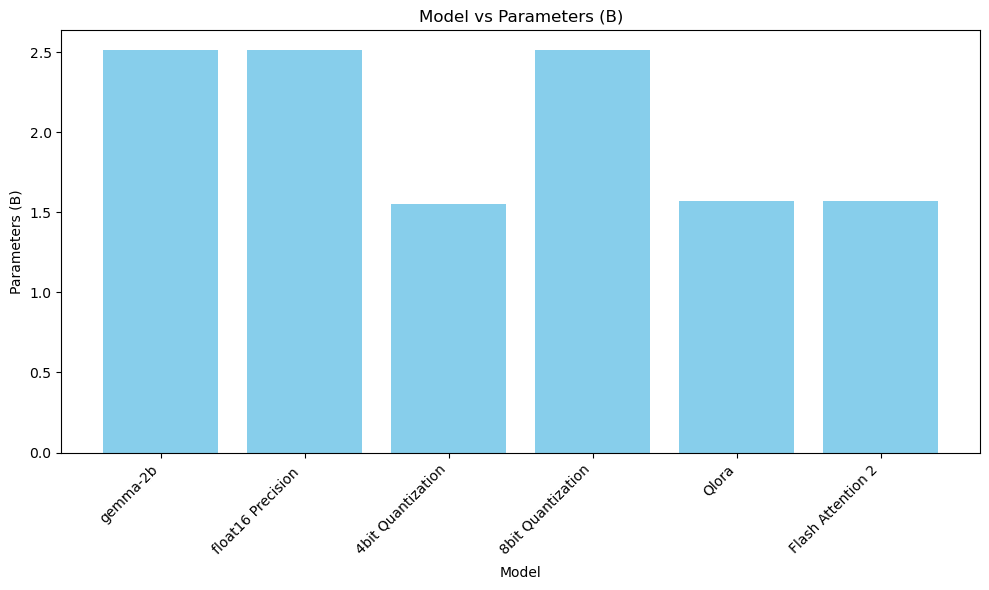

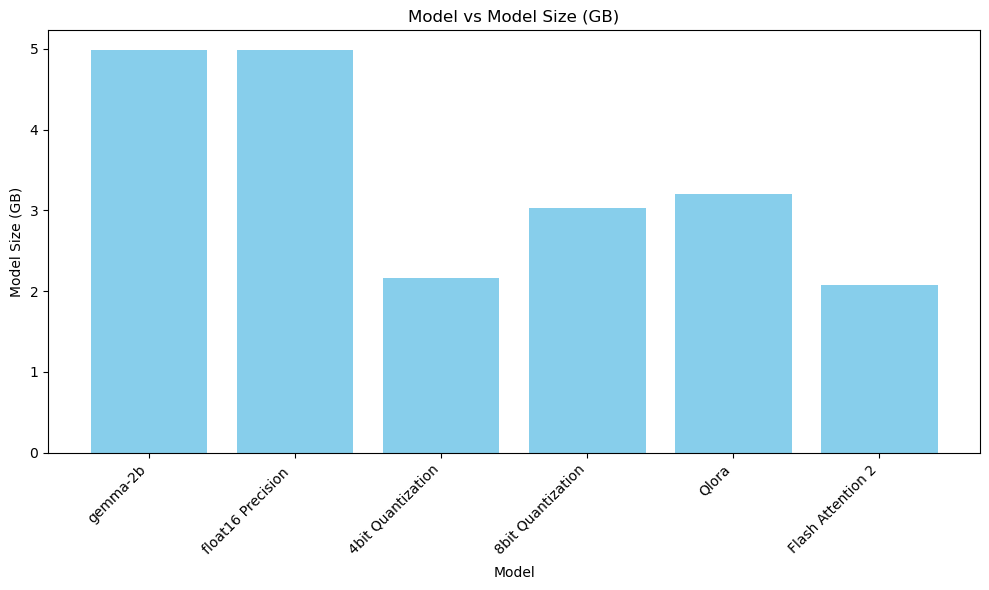

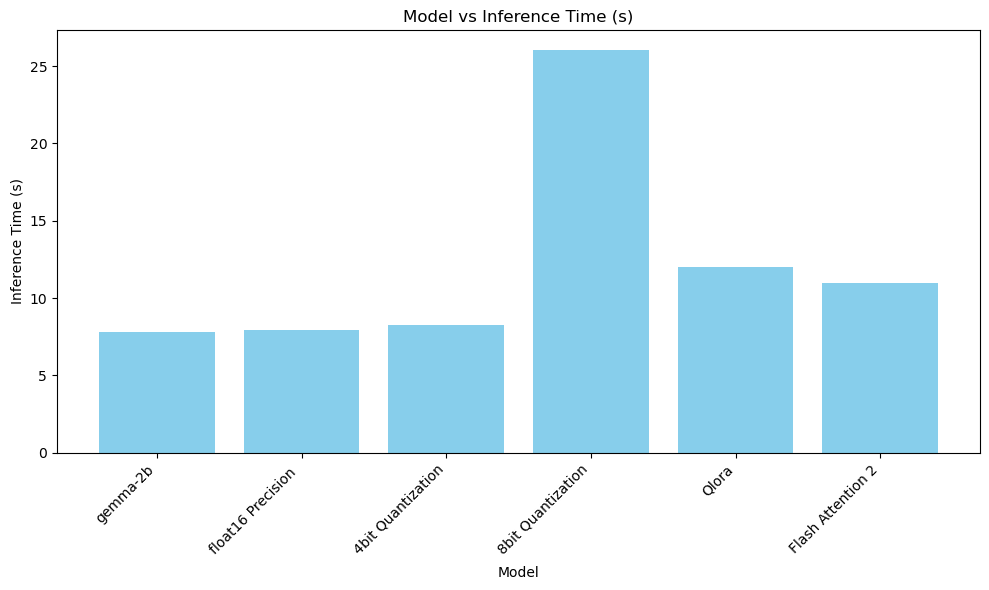

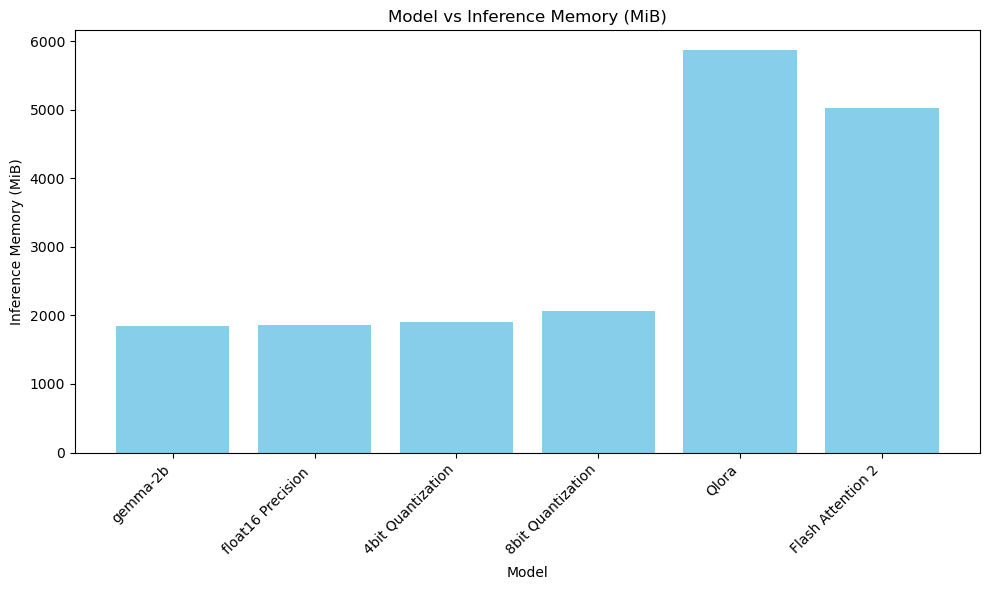

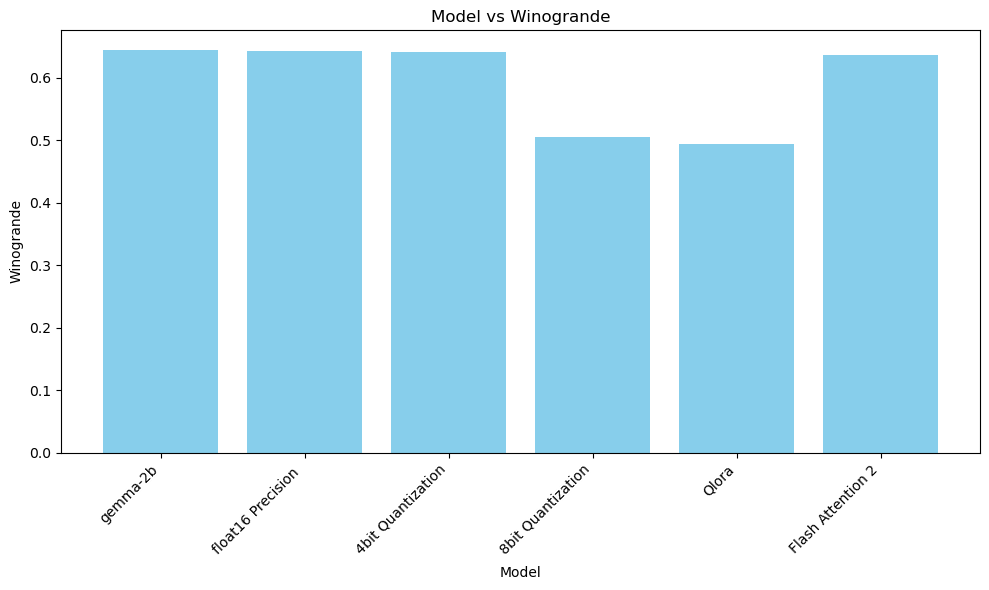

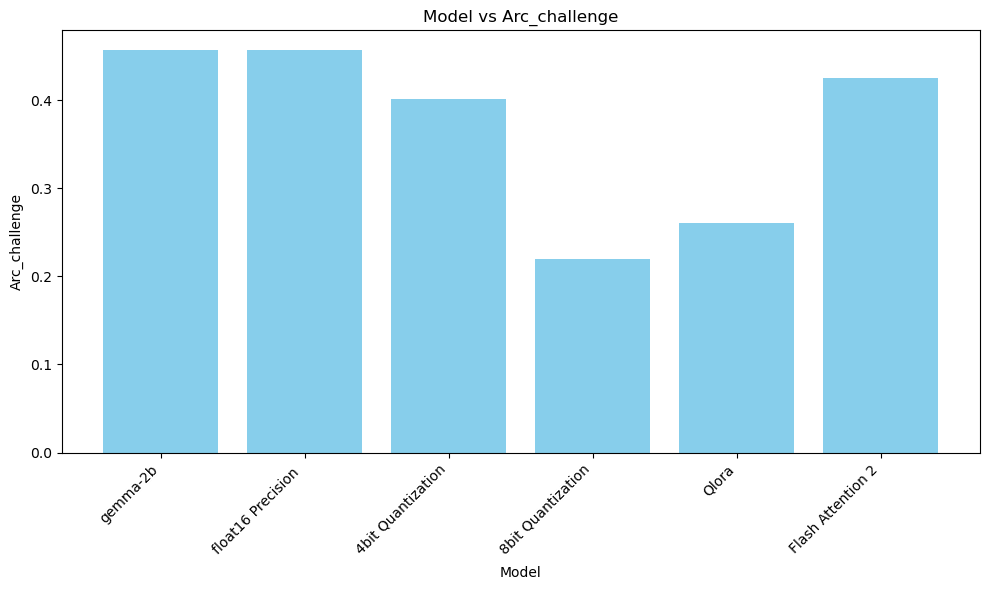

In [15]:
cols = df.columns[1:]

for i,v in enumerate(cols):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Model'], df[v], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(v)
    plt.title('Model vs ' + str(v))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


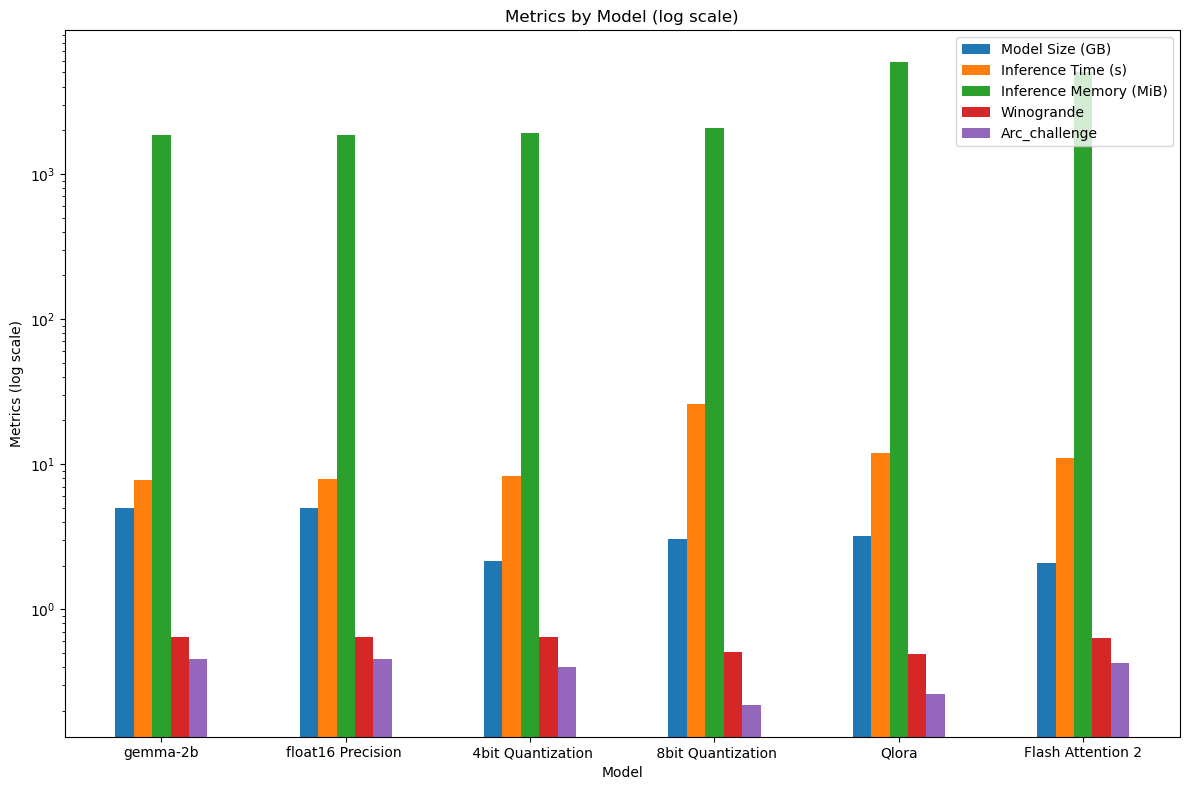

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Results.xlsx'  
df = pd.read_excel(excel_file)

models = df['Model'].unique()
parameters = df['Parameters (B)']
model_size = df['Model Size (GB)']
inference_time = df['Inference Time (s)']
inference_memory = df['Inference Memory (MiB)']
winogrande = df['Winogrande']
arc_challenge = df['Arc_challenge']

x = range(len(models))
width = 0.1  # Width of each bar

plt.figure(figsize=(12, 8))

plt.bar(x, model_size, width, label='Model Size (GB)')
plt.bar([i + width for i in x], inference_time, width, label='Inference Time (s)')
plt.bar([i + 2*width for i in x], inference_memory, width, label='Inference Memory (MiB)')
plt.bar([i + 3*width for i in x], winogrande, width, label='Winogrande')
plt.bar([i + 4*width for i in x], arc_challenge, width, label='Arc_challenge')

plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Model')
plt.ylabel('Metrics (log scale)')
plt.title('Metrics by Model (log scale)')
plt.xticks([i + 2 * width for i in x], models)
plt.legend()

plt.tight_layout()
plt.savefig('metrics_plot.png')  
plt.show()
